# Projeto de Análise de Vendas de Carros – Empresa X

Os dados utilizados neste projeto foram extraídos do dataset público "Análise de Vendas de Carros", disponível no Kaggle.

Esse conjunto de dados foi criado com o objetivo de simular a evolução das vendas de uma empresa fictícia ao longo do tempo, permitindo análises exploratórias, estudos de séries temporais e aplicações de modelos preditivos. Ele contém registros mensais de vendas, organizados em formato tabular, o que facilita a manipulação e visualização em ferramentas como Pandas e Matplotlib.

No presente notebook, utilizamos um recorte desse dataset (arquivo empresa_x.csv) para realizar uma análise temporal das vendas, identificar padrões de crescimento e extrair insights que podem apoiar decisões estratégicas na área comercial e de marketing.

In [1]:
# ============================================================
# 1. Importação de bibliotecas
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")


In [2]:
# ============================================================
# 2. Carregamento dos dados
# ============================================================
# Lendo o arquivo CSV enviado
df = pd.read_csv("empresa_x.csv")

# Visualizando as primeiras linhas
df.head()


,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
# ============================================================
# 3. Exploração inicial dos dados
# ============================================================
# Informações gerais
df.info()

# Estatísticas descritivas
df.describe()

# Verificando valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


mes       0
vendas    0
dtype: int64

In [4]:
# ============================================================
# 4. Tratamento e preparação dos dados
# ============================================================
# Convertendo a coluna 'mes' para formato de data
df['mes'] = pd.to_datetime(df['mes'])

# Criando colunas adicionais
df['ano'] = df['mes'].dt.year
df['mes_num'] = df['mes'].dt.month

df.head()


,mes,vendas,ano,mes_num
0,2017-01-31,10,2017,1
1,2017-02-28,20,2017,2
2,2017-03-31,33,2017,3
3,2017-04-30,47,2017,4
4,2017-05-31,63,2017,5


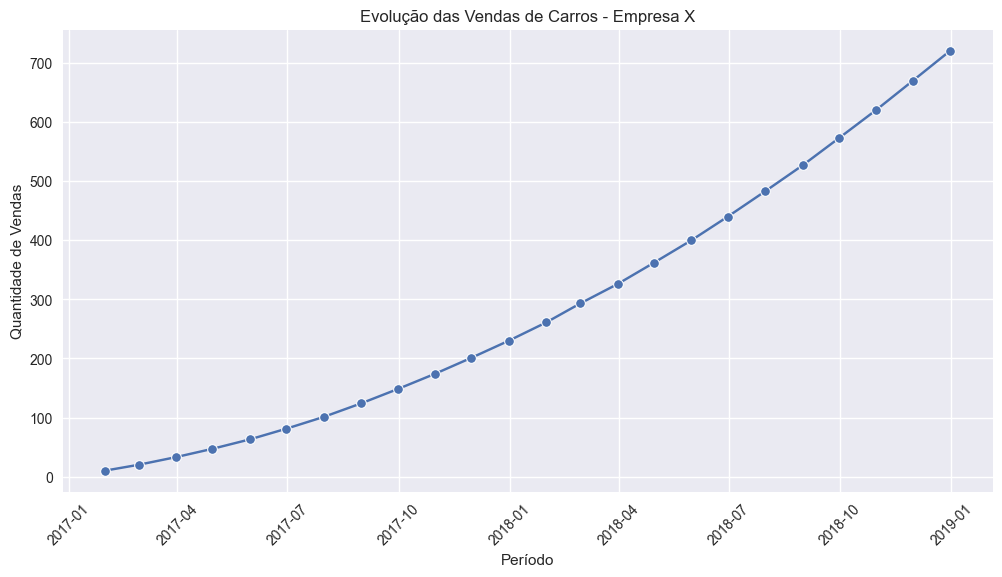

In [5]:
# ============================================================
# 5. Análise temporal das vendas
# ============================================================
plt.figure(figsize=(12,6))
sns.lineplot(x="mes", y="vendas", data=df, marker="o")
plt.title("Evolução das Vendas de Carros - Empresa X")
plt.xlabel("Período")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.show()


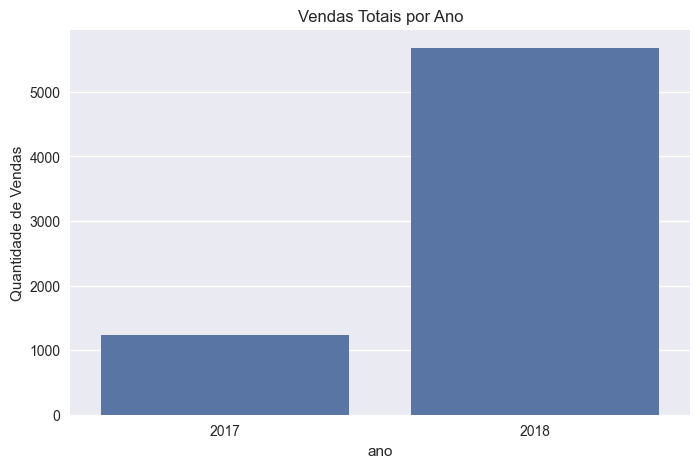

In [6]:
# ============================================================
# 6. Crescimento anual
# ============================================================
vendas_ano = df.groupby("ano")["vendas"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="ano", y="vendas", data=vendas_ano)
plt.title("Vendas Totais por Ano")
plt.ylabel("Quantidade de Vendas")
plt.show()


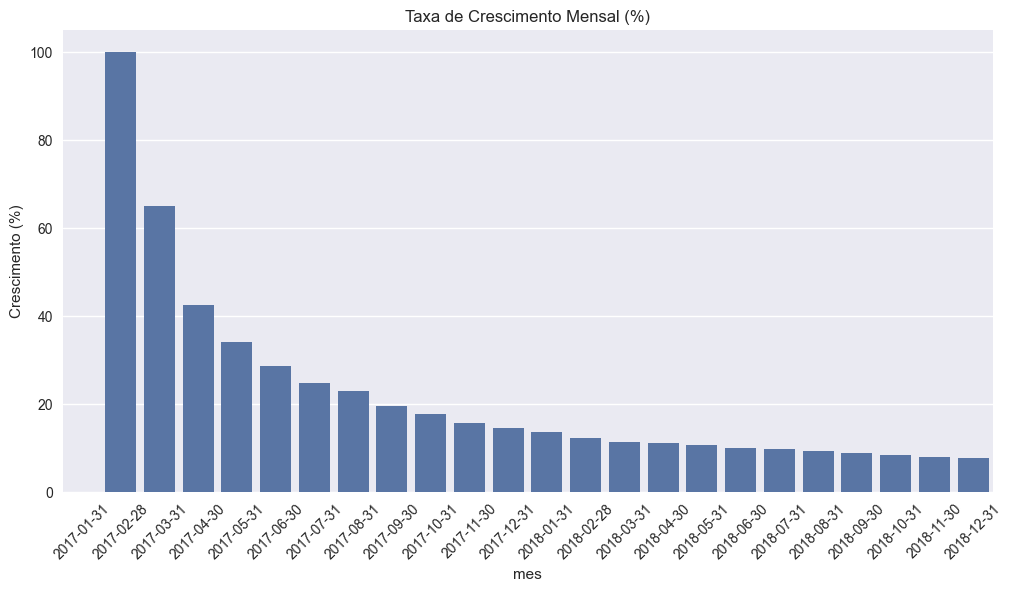

In [7]:
# ============================================================
# 7. Análise de crescimento mês a mês
# ============================================================
df['crescimento_mensal'] = df['vendas'].pct_change() * 100

plt.figure(figsize=(12,6))
sns.barplot(x="mes", y="crescimento_mensal", data=df)
plt.title("Taxa de Crescimento Mensal (%)")
plt.xticks(rotation=45)
plt.ylabel("Crescimento (%)")
plt.show()


In [8]:
# ============================================================
# 8. Insights principais
# ============================================================
# Último valor de vendas
ultimo_mes = df.iloc[-1]
print(f"Último mês registrado: {ultimo_mes['mes'].strftime('%Y-%m')}")
print(f"Vendas acumuladas até o último mês: {df['vendas'].sum()} carros")
print(f"Maior crescimento mensal: {df['crescimento_mensal'].max():.2f}%")
print(f"Menor crescimento mensal: {df['crescimento_mensal'].min():.2f}%")


Último mês registrado: 2018-12
Vendas acumuladas até o último mês: 6909 carros
Maior crescimento mensal: 100.00%
Menor crescimento mensal: 7.61%


In [10]:
# ============================================================
# 9. Conclusão
# ============================================================
# - As vendas apresentam crescimento consistente ao longo dos meses.
# - O ano de 2018 teve um volume significativamente maior que 2017.
# - A taxa de crescimento mensal mostra variações, mas a tendência geral é positiva.
# - Esses dados podem servir de base para previsões futuras e estratégias de marketing.
